# **Task 3 - Featuring Engineering and Modelling**

##- Amey Desai
---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [10]:
df = pd.read_csv('/content/clean_eda_data.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [11]:
df.head(3)

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   

  mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0          12.311304                8.182687      1  
1           0.000000                0.000000      0  
2           0.088409                0.000000      0  

[3 rows x 54 columns]

In [13]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

## 3. Feature Engineering
### Difference between off-peak price in december and preceding january
Your colleague has done some work on engineering the features within the cleaned dataset and has calculated a feature which seems to have predictive power.

In [15]:
price_df = pd.read_csv("price_data.csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [16]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
2  00114d74e963e47177db89bc70108537                        -0.003994   
3  00126c87cf78d7604278f0a9adeb689e                        -0.012908   
4  00184e957277eeef733a7b563fdabd06                        -0.004111   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.162916  
2                       -0.000001  
3                        0.162916  
4                       -0.000001

In [17]:
df = pd.merge(df, diff, on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           2  764c75f661154dac3a6c254cd082ea7d   
2           3  bba03439a292a1e166f80264c16191cb   
3           6  7ab4bf4878d8f7661dfc20e9b8e18011   
4           7  01495c955be7ec5e7f3203406785aae0   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
2  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
3  foosdfpfkusacimwkcsosbicdxkicaua     45097             0                0   
4  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
2 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
3 2011-12-02 2016-12-02      2011-12-02   2015-12-03  ...   
4 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.266930   
4                    0.074516                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.612508   
2                0.000000                    0.000000               44.593296   
3                0.000000                    0.000000               44.430291   
4               24.437330                   16.291555               40.847060   

   mean_3m_price_peak  mean_3m_price_mid_peak churn  \
0           12.311304                8.182687     1   
1            0.088409                0.000000     0   
2            0.000000                0.000000     0   
3            0.084305                0.000000     1   
4           24.537821               16.366071     0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.004670                        0.177779  
2                        -0.004547                        0.177779  
3                        -0.004628                        0.000000  
4                        -0.007801                        0.162916  

[5 rows x 56 columns]

In [18]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [19]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [20]:
columns = [
    'id',
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff',
    'peak_mid_peak_fix_mean_diff',
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           2  764c75f661154dac3a6c254cd082ea7d   
2           3  bba03439a292a1e166f80264c16191cb   
3           6  7ab4bf4878d8f7661dfc20e9b8e18011   
4           7  01495c955be7ec5e7f3203406785aae0   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
2  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
3  foosdfpfkusacimwkcsosbicdxkicaua     45097             0                0   
4  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
2 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
3 2011-12-02 2016-12-02      2011-12-02   2015-12-03  ...   
4 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...   

   mean_3m_price_mid_peak  churn  offpeak_diff_dec_january_energy  \
0                8.182687      1                         0.020057   
1                0.000000      0                        -0.004670   
2                0.000000      0                        -0.004547   
3                0.000000      1                        -0.004628   
4               16.366071      0                        -0.007801   

   offpeak_diff_dec_january_power  off_peak_peak_var_mean_diff  \
0                        3.700961                     0.024038   
1                        0.177779                     0.082090   
2                        0.177779                     0.151210   
3                        0.000000                     0.081316   
4                        0.162916                     0.020314   

   peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                     0.034219                         0.058257   
1                     0.088421                         0.170512   
2                     0.000000                         0.151210   
3                     0.084744                         0.166061   
4                     0.028965                         0.049279   

  off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                   18.590255                     7.450670   
1                   44.385450                     0.000000   
2                   44.400265                     0.000000   
3                   44.266930                     0.000000   
4                   16.269833                     8.134914   

   off_peak_mid_peak_fix_mean_diff  
0                        26.040925  
1                        44.385450  
2                        44.400265  
3                        44.266930  
4                        24.404747  

[5 rows x 62 columns]

In [21]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [22]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [23]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [24]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           2  764c75f661154dac3a6c254cd082ea7d   
2           3  bba03439a292a1e166f80264c16191cb   
3           6  7ab4bf4878d8f7661dfc20e9b8e18011   
4           7  01495c955be7ec5e7f3203406785aae0   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
2  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
3  foosdfpfkusacimwkcsosbicdxkicaua     45097             0                0   
4  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
2 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
3 2011-12-02 2016-12-02      2011-12-02   2015-12-03  ...   
4 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.170512                    44.385450   
2                         0.151210                    44.400265   
3                         0.166061                    44.266930   
4                         0.049279                    16.269833   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.385450   
2                     0.000000                        44.400265   
3                     0.000000                        44.266930   
4                     8.134914                        24.404747   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.084587                            0.089162   
2                            0.153133                            0.000000   
3                            0.082931                            0.085058   
4                            0.022581                            0.031859   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.172468                          44.444710   
2                                0.153133                          44.444710   
3                                0.167989                          44.266930   
4                                0.054440                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.26693  
4                            8.145775                                24.43733  

[5 rows x 68 columns]

In [25]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
2  00114d74e963e47177db89bc70108537                        -0.003994   
3  00126c87cf78d7604278f0a9adeb689e                        -0.012908   
4  00184e957277eeef733a7b563fdabd06                        -0.004111   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.162916  
2                       -0.000001  
3                        0.162916  
4                       -0.000001

## Bonus Feature engineering
### Tenure
How long a company has been a client of PowerCo.

In [26]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)


In [27]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)


churn
tenure          
3       0.148380
2       0.144330
4       0.130046
13      0.093750
6       0.084851
5       0.083151
12      0.076087
7       0.075615
8       0.069767
11      0.060606
10      0.026316
9       0.000000

Companies who have been only client for  four month or less then four month are much more likely to churn compared to other client

## Transforming dates into months

In [28]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [29]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [30]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           2  764c75f661154dac3a6c254cd082ea7d   
2           3  bba03439a292a1e166f80264c16191cb   
3           6  7ab4bf4878d8f7661dfc20e9b8e18011   
4           7  01495c955be7ec5e7f3203406785aae0   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
2  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
3  foosdfpfkusacimwkcsosbicdxkicaua     45097             0                0   
4  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1              47.96                   0                       0.0   
2             240.04                   0                       0.0   
3            8069.28                   0                       0.0   
4             864.73                 751                       0.0   

   forecast_meter_rent_12m  ...  peak_mid_peak_var_max_monthly_diff  \
0                     1.78  ...                            0.085483   
1                    38.72  ...                            0.089162   
2                    19.83  ...                            0.000000   
3                     0.00  ...                            0.085058   
4                   144.49  ...                            0.031859   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                           44.266930   
1                                0.172468                           44.444710   
2                                0.153133                           44.444710   
3                                0.167989                           44.266930   
4                                0.054440                           16.291555   

  peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                           8.145775                                44.26693   
1                           0.000000                                44.44471   
2                           0.000000                                44.44471   
3                           0.000000                                44.26693   
4                           8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  
0       3            30              5                  2               6  
1       6            68              3                 68               8  
2       6            69              2                 69               9  
3       5            48             11                 48               0  
4       6            68              3                 68               8  

[5 rows x 69 columns]

## Transforming boolean data

has_gas
we simply want to transform this column from being categorical to being a binary flag

In [ ]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

Customer who buy multiple products from company are show client are loyal towards company. churn % are low  

## Transforming categorical data

In [31]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    5151
MISSING                             2573
lmkebamcaaclubfxadlmueccxoimlema    1362
usilxuppasemubllopkaafesmlibmsdf    1067
ewpakwlliwisiwduibdlfmalxowmwpci     686
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [32]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57         0         54946   
1           2  764c75f661154dac3a6c254cd082ea7d       544             0   
2           3  bba03439a292a1e166f80264c16191cb      1584             0   
3           6  7ab4bf4878d8f7661dfc20e9b8e18011     45097             0   
4           7  01495c955be7ec5e7f3203406785aae0     29552             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0               0.00                   0   
1                0              47.96                   0   
2                0             240.04                   0   
3                0            8069.28                   0   
4             1260             864.73                 751   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    38.72   
2                       0.0                    19.83   
3                       0.0                     0.00   
4                       0.0                   144.49   

   forecast_price_energy_off_peak  ...  tenure  months_activ months_to_end  \
0                        0.114481  ...       3            30             5   
1                        0.165794  ...       6            68             3   
2                        0.146694  ...       6            69             2   
3                        0.166178  ...       5            48            11   
4                        0.115174  ...       6            68             3   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 68               8                0   
2                 69               9                0   
3                 48               0                0   
4                 68               8                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         0   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

  channel_usilxuppasemubllopkaafesmlibmsdf  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 73 columns]

## Transforming numerical data

In [38]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.085500e+04  1.085500e+04     10855.000000       10855.000000   
mean   1.608794e+05  2.796914e+04     16183.029756        1902.632493   
std    5.721313e+05  1.621935e+05     64440.469537        2398.964349   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.818500e+03  0.000000e+00         0.000000         507.190000   
50%    1.451200e+04  0.000000e+00       815.000000        1138.320000   
75%    4.196250e+04  0.000000e+00      3490.500000        2464.825000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        10855.000000              10855.000000             10855.000000   
mean          1415.862368                  1.021004                63.091502   
std           3279.681610                  5.235043                65.487262   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.190000   
50%            329.000000                  0.000000                18.870000   
75%           1773.500000                  0.000000               131.010000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    10855.000000                10855.000000   
mean                         0.137335                    0.050564   
std                          0.024567                    0.049053   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.168092   

       forecast_price_pow_off_peak  
count                 10855.000000  
mean                     43.122705  
std                       4.394005  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [39]:
#Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [40]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  10855.000000  10855.000000     10855.000000       10855.000000   
mean       4.235799      0.785777         2.283960           2.974320   
std        0.882154      1.718450         1.768242           0.676199   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.764886      0.000000         0.000000           2.706026   
50%        4.161757      0.000000         2.911690           3.056646   
75%        4.622872      0.000000         3.543012           3.391962   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        10855.000000              10855.000000             10855.000000   
mean             1.796431                  1.021004                 1.517772   
std              1.586172                  5.235043                 0.572681   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235276   
50%              2.518514                  0.000000                 1.298198   
75%              3.249076                  0.000000                 2.120607   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    10855.000000                10855.000000   
mean                         0.137335                    0.050564   
std                          0.024567                    0.049053   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.168092   

       forecast_price_pow_off_peak  
count                 10855.000000  
mean                     43.122705  
std                       4.394005  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

<ipython-input-41-f63759cfd0e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
<ipython-input-41-f63759cfd0e3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
/usr/local/lib/python3.10/dist-packa

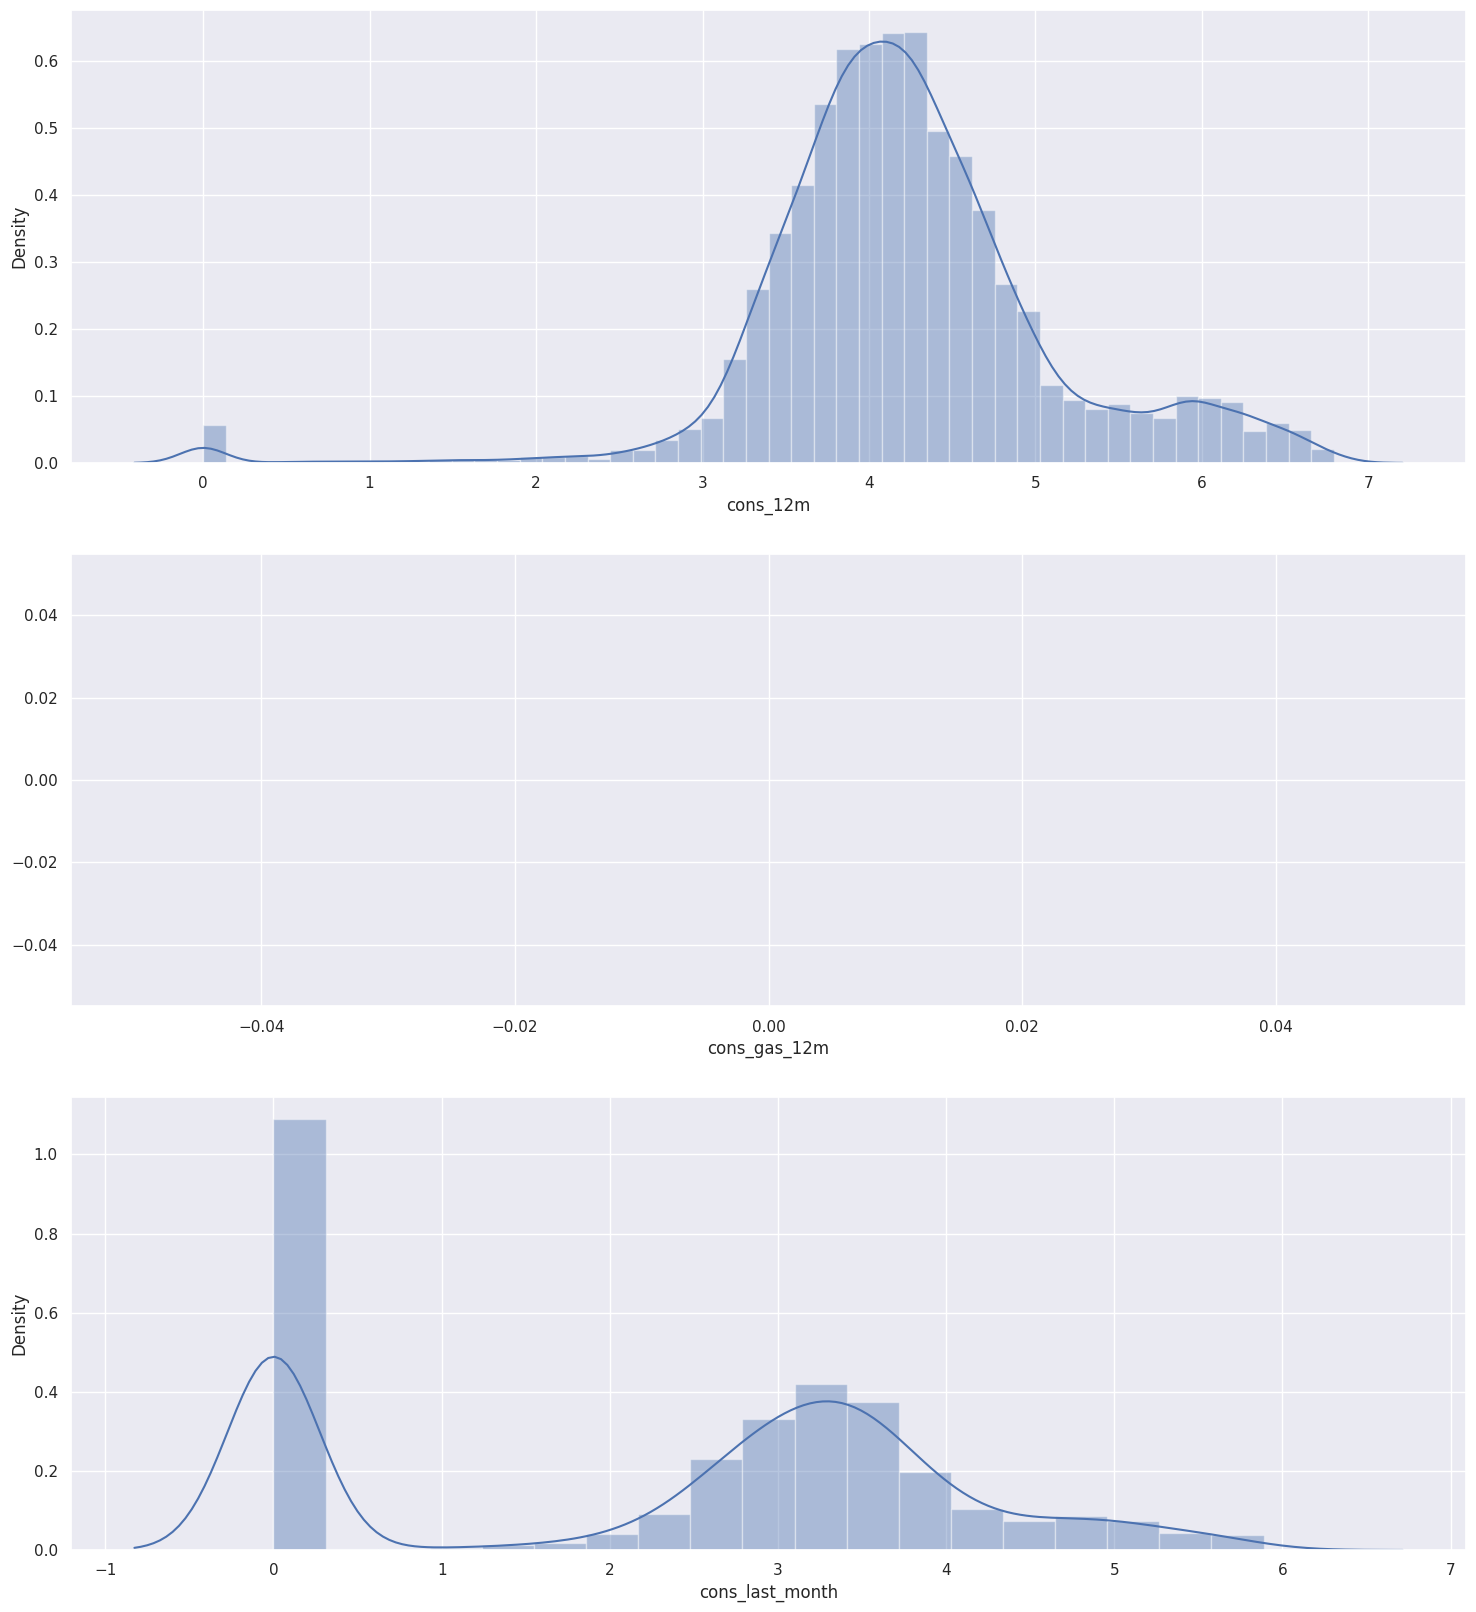

In [41]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

## Correlations

This is important because it reveals the linear relationships between features. We want features to correlate with churn, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption.

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let's look at how all the features within the model are correlated.

In [42]:
correlation = df.corr()

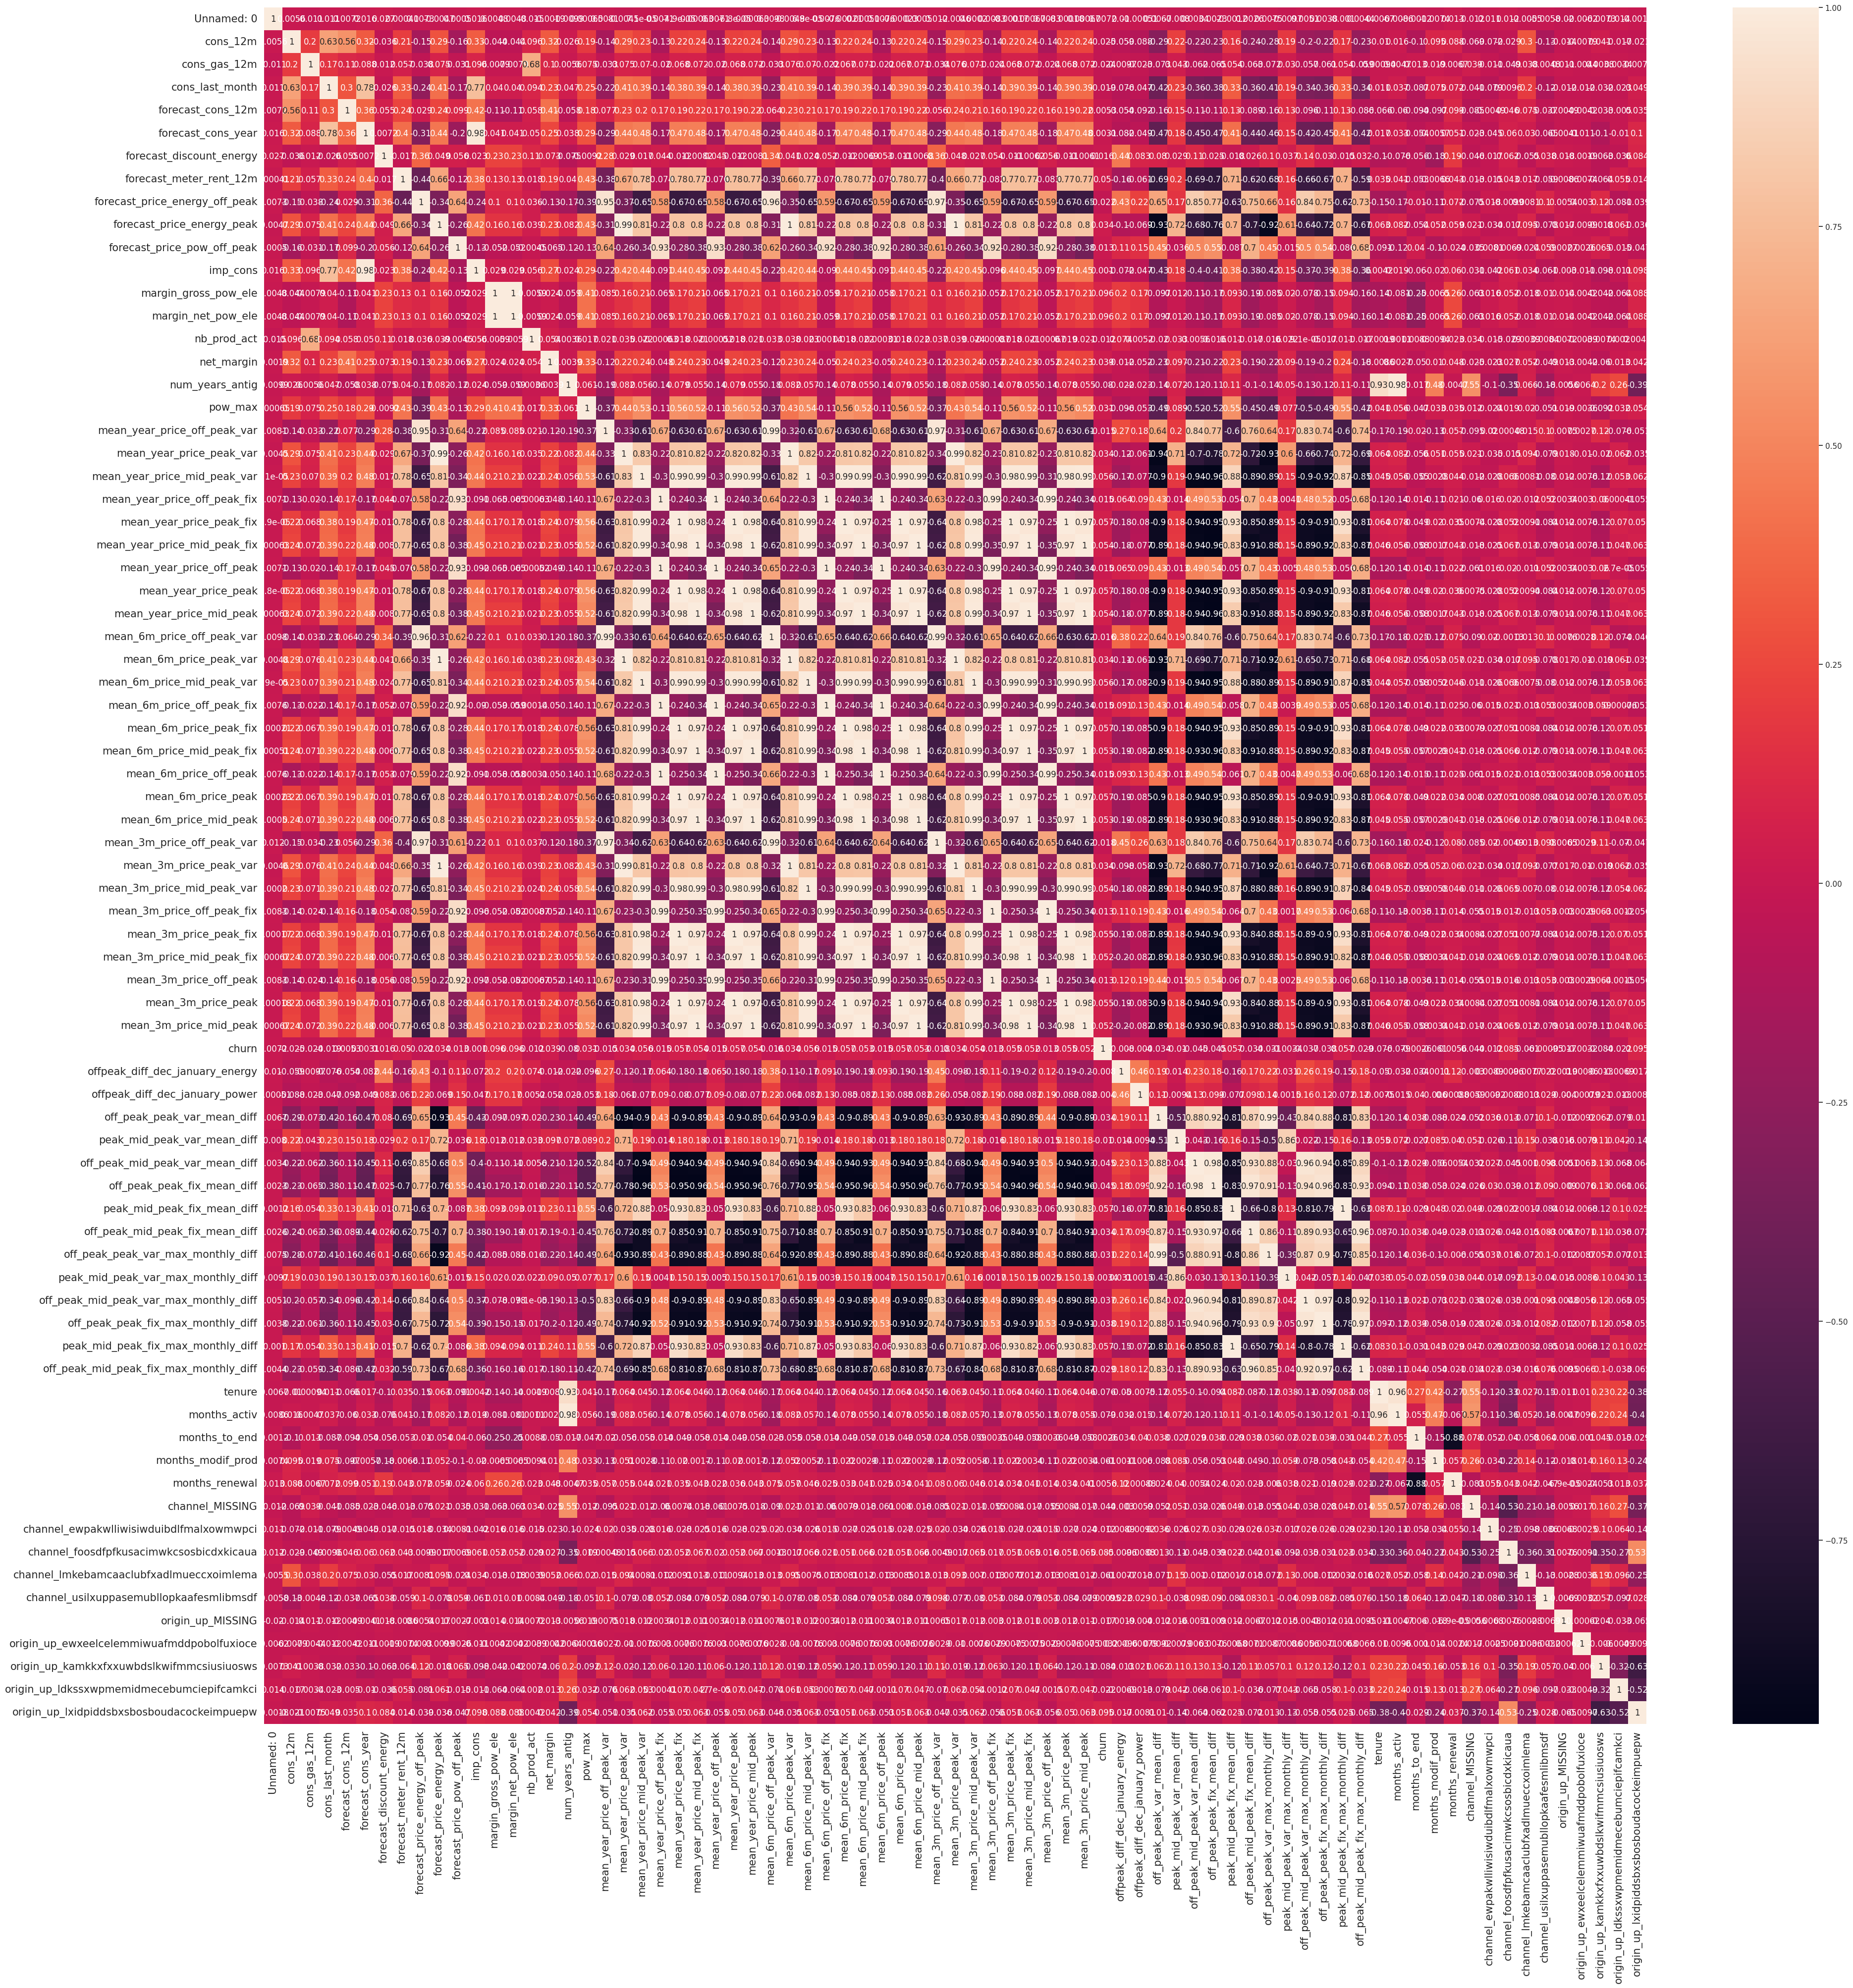

In [43]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

I will remove two variables which exhibit a high correlation with other independent features.

In [44]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1           2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
2           3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
3           6  7ab4bf4878d8f7661dfc20e9b8e18011  4.654157      0.000000   
4           7  01495c955be7ec5e7f3203406785aae0  4.470602      0.000000   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           0.000000                       0.0   
1         0.000000           1.689841                       0.0   
2         0.000000           2.382089                       0.0   
3         0.000000           3.906889                       0.0   
4         3.100715           2.937382                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.444045                        0.114481   
1                 1.599009                        0.165794   
2                 1.318689                        0.146694   
3                 0.000000                        0.166178   
4                 2.162833                        0.115174   

   forecast_price_energy_peak  ...  channel_MISSING  \
0                    0.098142  ...                0   
1                    0.087899  ...                0   
2                    0.000000  ...                0   
3                    0.087538  ...                0   
4                    0.098837  ...                0   

  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         0   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                         0                  0   
1                                         0                  0   
2                                         0                  0   
3                                         0                  0   
4                                         0                  0   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           1  
4                                           1  

[5 rows x 75 columns]

## Modelling
We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a Random Forest classifier.



In [45]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Data Sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [50]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(10855, 73)
(10855,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8141, 73)
(8141,)
(2714, 73)
(2714,)


## Model Training

In [ ]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [ ]:
y_test.value_counts()

0    3279
1     373
Name: churn, dtype: int64

In [ ]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 18
False positives: 0
True negatives: 3279
False negatives: 355

Accuracy: 0.9027929901423878
Precision: 1.0
Recall: 0.04825737265415549


## Model understanding

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

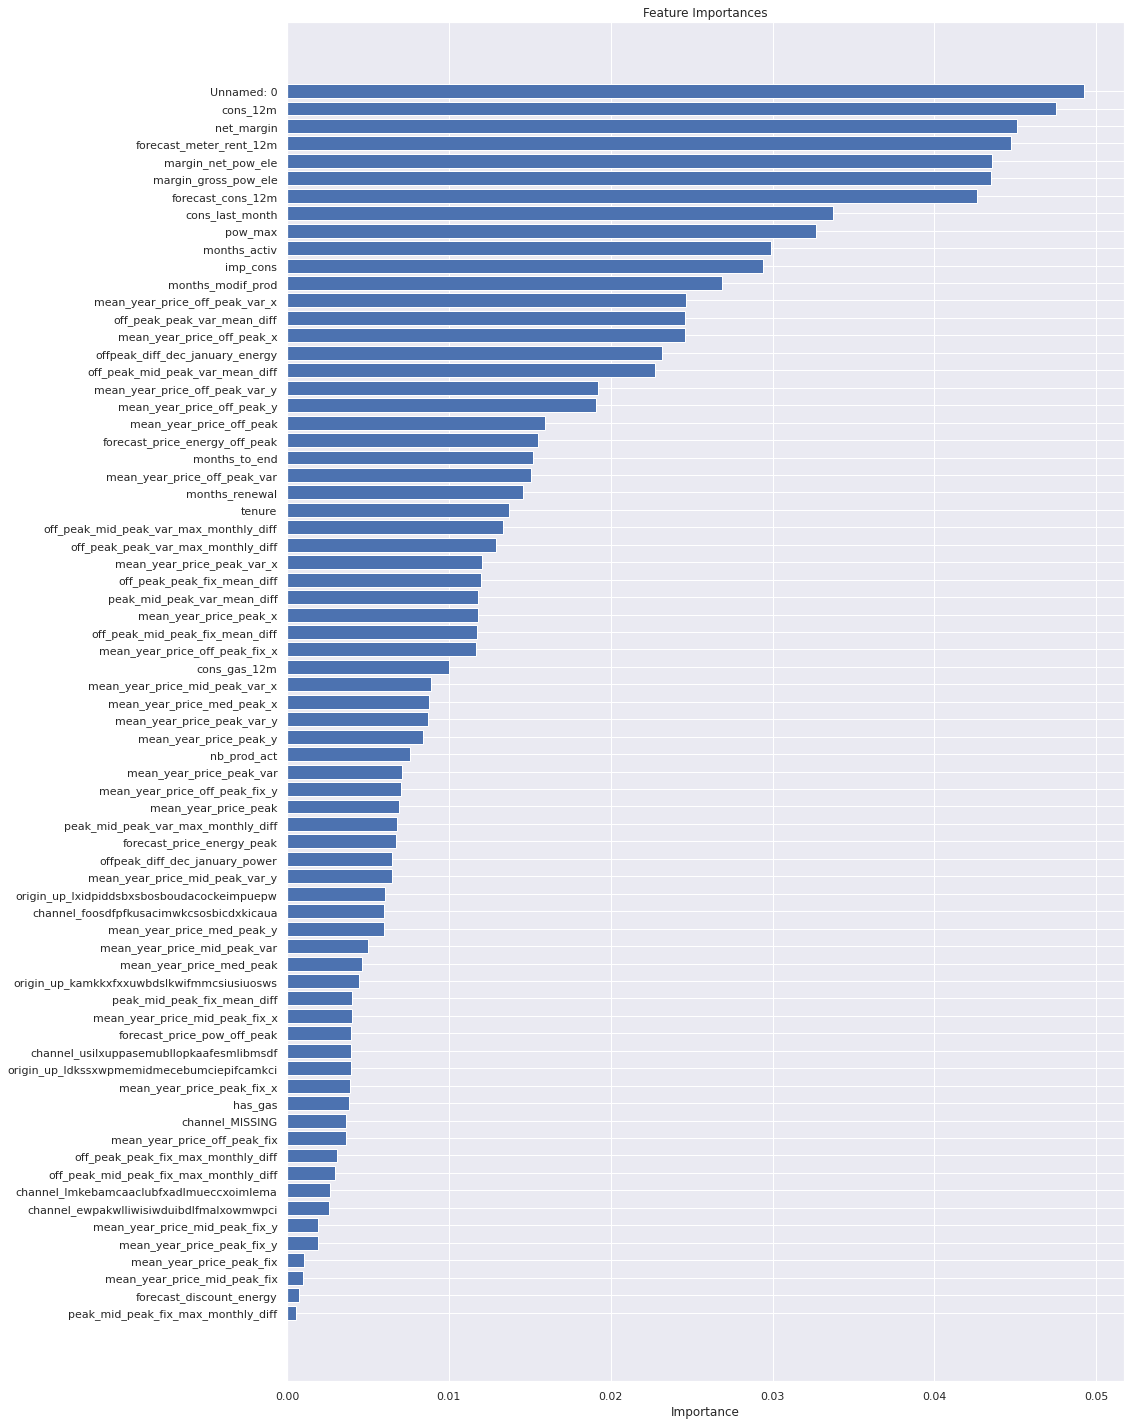

In [ ]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [ ]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [ ]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [ ]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')